## Retail Insights through Apriori-Based Market Basket Analysis

Market Basket Analysis is a powerful technique for identifying patterns and associations between items frequently purchased together by customers. These insights provide valuable opportunities to inform business strategies. By understanding co-purchased items, businesses can make data-driven product recommendations, boosting cross-selling and upselling efforts. Additionally, optimizing product placement and store layout based on these associations can enhance the shopping experience. Leveraging these item relationships also enables more effective promotional campaigns, driving higher customer engagement and increasing sales.

The dataset comprises transaction data from a retailer, capturing all sales activity over a defined period. It provides a detailed record of each customer’s purchase, offering insights into sales trends, customer behavior, and product interactions. With a focus on individual transactions, the data enables a deeper understanding of buying patterns, which is crucial for techniques such as market basket analysis. By uncovering relationships between items frequently purchased together, the dataset can provide valuable insights that drive targeted marketing, inventory management, and other strategic business decisions such as cross-selling and up-selling recommendations

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [77]:
data = pd.read_csv('Retail_Dataset.csv')

In [78]:
print('The number of rows and columns in the dataset are:', data.shape)

The number of rows and columns in the dataset are: (541909, 8)


In [79]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
383805,570088,20711,JUMBO BAG TOYS,2,07/10/2011 11:32,2.08,16764.0,United Kingdom
218067,555979,79030D,TUMBLER BAROQUE,6,08/06/2011 11:18,0.39,15039.0,United Kingdom
477288,577056,84946,ANTIQUE SILVER T-LIGHT GLASS,12,17/11/2011 14:24,1.25,17985.0,United Kingdom
113647,545995,22292,HANGING CHICK YELLOW DECORATION,8,08/03/2011 13:54,1.45,15023.0,United Kingdom
190024,553180,21584,RETROSPOT SMALL TUBE MATCHES,2,15/05/2011 11:35,1.65,16466.0,United Kingdom
96616,544572,22839,3 TIER CAKE TIN GREEN AND CREAM,1,21/02/2011 13:21,14.95,14639.0,United Kingdom
213853,555558,22961,JAM MAKING SET PRINTED,2,05/06/2011 14:06,1.45,14159.0,United Kingdom
475098,576862,23493,VINTAGE DOILY TRAVEL SEWING KIT,10,16/11/2011 16:06,1.95,14825.0,United Kingdom
136726,547969,22521,CHILDS GARDEN TROWEL PINK,3,28/03/2011 16:27,0.85,17238.0,United Kingdom
271824,560723,23300,GARDENERS KNEELING PAD CUP OF TEA,1,20/07/2011 13:53,1.65,16464.0,United Kingdom


Below is a brief description of each column:

1. InvoiceNo: A unique identifier for each transaction (invoice) made by the retailer.
2. StockCode: The unique code assigned to each product in the retailer's inventory.
3. Description: A brief description of the product or item sold.
4. Quantity: The number of units of a product purchased in each transaction.
5. InvoiceDate: The date and time when the transaction occurred.
6. UnitPrice: The price of a single unit of the product sold.
7. CustomerID: A unique identifier assigned to each customer making the purchase.
8. Country: The country from which the customer made the transaction.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [81]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

To ensure the integrity of the analysis, it is essential to preprocess the data by cleaning it of any missing values, outliers, or other abnormalities. This step is critical for maintaining high data quality, which ultimately enables more accurate insights and informed business decisions. An initial examination of the dataset reveals the presence of empty rows and potential datatype inconsistencies across various columns. Therefore, a comprehensive scan of each column is necessary to identify and rectify any irregularities before proceeding with further analysis.

The dataset comprises over 500k rows, with each entry representing a unique item purchase transaction made by a customer. It includes approximately 4,000 customers from 38 different countries and covers a total stock of 4,223 items available in the retailer's inventory. This breadth of data underscores the importance of a meticulous preprocessing phase to ensure the reliability of insights derived from the dataset.

In [82]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
87699,543713,22896,PEG BAG APPLES DESIGN,1,11/02/2011 11:46,5.79,NaN,United Kingdom
6145,536876,90120B,BLUE MURANO TWIST BRACELET,1,03/12/2010 11:36,4.24,NaN,United Kingdom
364664,568668,23155,KNICKERBOCKERGLORY MAGNET ASSORTED,6,28/09/2011 13:00,0.83,15750.0,United Kingdom
413432,572312,16156S,WRAP PINK FAIRY CAKES,25,23/10/2011 15:47,0.42,15022.0,United Kingdom
538381,581405,22754,SMALL RED BABUSHKA NOTEBOOK,1,08/12/2011 13:50,0.21,13521.0,United Kingdom
142700,548627,22440,BALLOON WATER BOMB PACK OF 35,1200,01/04/2011 12:19,0.36,16333.0,United Kingdom
115132,546107,22467,GUMBALL COAT RACK,2,09/03/2011 12:33,2.55,17238.0,United Kingdom
311060,564221,48185,DOORMAT FAIRY CAKE,2,24/08/2011 09:36,14.13,NaN,United Kingdom
145192,548870,22079,RIBBON REEL HEARTS DESIGN,1,04/04/2011 14:41,1.65,14606.0,United Kingdom
259625,559698,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,6,11/07/2011 17:07,2.55,17589.0,United Kingdom


The StockCode and Description columns in the dataframe convey similar information, with StockCode representing the unique code assigned to each product and Description providing a brief overview of the item. To streamline the dataset and reduce complexity before conducting market basket analysis, it is advisable to remove one of these columns. Opting to retain the Description column allows for deeper insights into the item names, which can be instrumental in formulating effective marketing strategies.

In [83]:
data = data.drop(columns=['StockCode'])

In [84]:
data[data['InvoiceNo'].str.isdigit() == False]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,Discount,-1,01/12/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,ZINC T-LIGHT HOLDER STARS SMALL,-11,09/12/2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,Manual,-1,09/12/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,VICTORIAN SEWING BOX LARGE,-5,09/12/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,HANGING HEART JAR T-LIGHT HOLDER,-1,09/12/2011 11:58,1.25,17315.0,United Kingdom


In [85]:
data["InvoiceNo"] = data["InvoiceNo"].astype('str')
data = data[~data["InvoiceNo"].str.contains("C")]

In [86]:
data[data['InvoiceNo'].str.isdigit() == False]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,Adjust bad debt,1,12/08/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,Adjust bad debt,1,12/08/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,Adjust bad debt,1,12/08/2011 14:52,-11062.06,NaN,United Kingdom


In [87]:
data = data[~data["InvoiceNo"].str.contains("A")]

In [88]:
data['InvoiceNo'] = data['InvoiceNo'].astype('int64')

The data preprocessing begins with the InvoiceNo column, where the goal is to identify and eliminate any entries associated with inconsistent transactions, as they do not contribute to the association analysis of customer purchasing history. Upon examination, it is noted that invoices starting with 'C' likely indicate canceled transactions and should be excluded from the analysis. Additionally, there are three entries labeled 'Adjust bad debt,' which do not provide valuable insights for our purposes and should also be removed. Finally, the datatype of the InvoiceNo column will be corrected to ensure the data quality is optimal for analysis.

In [89]:
data[data['Description'].isna()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,NaN,56,01/12/2010 11:52,0.0,NaN,United Kingdom
1970,536545,NaN,1,01/12/2010 14:32,0.0,NaN,United Kingdom
1971,536546,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom
1972,536547,NaN,1,01/12/2010 14:33,0.0,NaN,United Kingdom
1987,536549,NaN,1,01/12/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
535322,581199,NaN,-2,07/12/2011 18:26,0.0,NaN,United Kingdom
535326,581203,NaN,15,07/12/2011 18:31,0.0,NaN,United Kingdom
535332,581209,NaN,6,07/12/2011 18:35,0.0,NaN,United Kingdom
536981,581234,NaN,27,08/12/2011 10:33,0.0,NaN,United Kingdom


In [90]:
data = data[data['Description'].notna()]

Upon examining the data with missing values in the *Description* column, it is clear that these entries lack meaningful information. Since the item names are unavailable, these records are likely not essential for analysis. The missing values account for 1,454 rows, which is an insignificant ratio compared to the overall number of rows in the dataset. Therefore, removing these rows is a reasonable step, as they will not be essential for further analysis.

In [91]:
data[data['Quantity'] < 1]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
7313,537032,?,-30,03/12/2010 16:50,0.0,NaN,United Kingdom
13217,537425,check,-20,06/12/2010 15:35,0.0,NaN,United Kingdom
13218,537426,check,-35,06/12/2010 15:36,0.0,NaN,United Kingdom
13264,537432,damages,-43,06/12/2010 16:10,0.0,NaN,United Kingdom
21338,538072,faulty,-13,09/12/2010 14:10,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...
535333,581210,check,-26,07/12/2011 18:36,0.0,NaN,United Kingdom
535335,581212,lost,-1050,07/12/2011 18:38,0.0,NaN,United Kingdom
535336,581213,check,-30,07/12/2011 18:38,0.0,NaN,United Kingdom
536908,581226,missing,-338,08/12/2011 09:56,0.0,NaN,United Kingdom


In [92]:
data = data[data['Quantity'] >= 1]

A noteworthy observation is the presence of negative values in the Quantity column, totaling 474 rows, which could stem from a single or multiple transactions or customers. Given that these rows constitute a minimal ratio of the overall dataset, it is prudent to remove them, as negative quantities may indicate system errors or irrelevant data for our analysis. Furthermore, the corresponding Description for these entries typically does not refer to specific item names but rather suggests that the stock or item is faulty or damaged. Eliminating these rows will enhance data accuracy and reliability while mitigating potential biases or misleading information.

Next, attention turns to the missing values in the *CustomerID* column. Investigating these missing values aims to identify potential issues or data quality concerns associated with them. Understanding the nature of these missing entries will help determine their impact on the overall analysis and guide the appropriate course of action for handling them.

In [93]:
data[data['CustomerID'].isna()]

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,DECORATIVE ROSE BATHROOM BOTTLE,1,01/12/2010 14:32,2.51,NaN,United Kingdom
1444,536544,DECORATIVE CATS BATHROOM BOTTLE,2,01/12/2010 14:32,2.51,NaN,United Kingdom
1445,536544,POLKADOT RAIN HAT,4,01/12/2010 14:32,0.85,NaN,United Kingdom
1446,536544,RAIN PONCHO RETROSPOT,2,01/12/2010 14:32,1.66,NaN,United Kingdom
1447,536544,VINTAGE SNAP CARDS,9,01/12/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...
541536,581498,JUMBO BAG RED RETROSPOT,5,09/12/2011 10:26,4.13,NaN,United Kingdom
541537,581498,JUMBO BAG BAROQUE BLACK WHITE,4,09/12/2011 10:26,4.13,NaN,United Kingdom
541538,581498,LADIES & GENTLEMEN METAL SIGN,1,09/12/2011 10:26,4.96,NaN,United Kingdom
541539,581498,S/4 CACTI CANDLES,1,09/12/2011 10:26,10.79,NaN,United Kingdom


Examining a sample of rows with missing CustomerID values reveals no clear pattern or specific reason for their absence. This observation suggests that the missing entries were not due to accidental omission or a systematic issue, but likely occur naturally in the dataset without any particular significance. Therefore, these values will remain unchanged.

In [94]:
data['CustomerID'] = data['CustomerID'].astype('Int64')

Focus shifts to the *UnitPrice* column to investigate any potential issues or anomalies. Analyzing the *UnitPrice* column is crucial for ensuring accurate and reliable pricing information for the analysis. Identifying any irregularities or unexpected values within this column will contribute to maintaining data integrity and enhancing the overall quality of insights derived from the dataset.

In [95]:
zero_price_count = len(data[data['UnitPrice'] == 0])
print("Number of rows where price is zero:", zero_price_count)
negative_price_count = len(data[data['UnitPrice'] < 0])
print("Number of rows where price is negative:", negative_price_count)

Number of rows where price is zero: 587
Number of rows where price is negative: 0


In [96]:
data[data['UnitPrice'] == 0].sample(20)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
516188,579879,check,17,30/11/2011 17:13,0.0,<NA>,United Kingdom
14384,537534,HOLIDAY FUN LUDO,1,07/12/2010 11:48,0.0,<NA>,United Kingdom
254131,559296,PACK OF 12 LONDON TISSUES,204,07/07/2011 12:35,0.0,<NA>,United Kingdom
418658,572739,found,16,25/10/2011 15:44,0.0,<NA>,United Kingdom
104440,545176,FRENCH BLUE METAL DOOR SIGN 1,2,28/02/2011 14:19,0.0,<NA>,United Kingdom
454464,575579,PAPER BUNTING VINTAGE PAISLEY,24,10/11/2011 11:49,0.0,13081,United Kingdom
124006,546933,FRENCH BLUE METAL DOOR SIGN 4,4,18/03/2011 11:02,0.0,<NA>,United Kingdom
14350,537534,SET OF 6 SOLDIER SKITTLES,1,07/12/2010 11:48,0.0,<NA>,United Kingdom
41475,539856,CERAMIC LOVE HEART MONEY BANK,1,22/12/2010 14:41,0.0,<NA>,United Kingdom
41456,539856,"RETRO ""TEA FOR ONE""",1,22/12/2010 14:41,0.0,<NA>,United Kingdom


Examining zero-priced transactions is essential to uncover their significance and potential impact on the analysis, as understanding the context behind these entries can yield insights into promotional activities, giveaways, or other unique dataset features that enhance our understanding of customer behavior and sales dynamics. However, a review of a sample of these rows indicates that they may lead to misleading or inaccurate conclusions, with no clear rationale or context provided for these transactions. Therefore, it is wise to remove these entries from the dataset to uphold the integrity and reliability of the analysis.

In [97]:
data = data[data['UnitPrice'] != 0]

In [98]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')

The datatype of the InvoiceDate column has been correctly set to datetime to ensure the data's reliability and accuracy. This adjustment also prepares the column for any time-based analysis, such as identifying trends or seasonality, or conducting monthly sales associations, thereby enhancing the ability to understand patterns in customer behavior and sales dynamics.

In [99]:
data['Revenue'] = data['UnitPrice'] * data['Quantity']

In [100]:
data.sample(10)

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
482842,577485,SET OF 3 WOODEN SLEIGH DECORATIONS,2,2011-11-20 11:56:00,1.25,16360,United Kingdom,2.50
41400,539837,DOORMAT ENGLISH ROSE,2,2010-12-22 13:48:00,7.95,14532,United Kingdom,15.90
67697,541843,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2011-01-23 12:08:00,1.25,13659,United Kingdom,15.00
462969,576051,PINK VINTAGE SPOT BEAKER,8,2011-11-13 14:45:00,0.85,14911,EIRE,6.80
9853,537219,ASSORTED COLOUR MINI CASES,1,2010-05-12 15:47:00,7.95,14081,United Kingdom,7.95
143065,548664,HANGING METAL RABBIT DECORATION,24,2011-01-04 14:45:00,1.25,14911,EIRE,30.00
101694,544928,WHITE HANGING HEART T-LIGHT HOLDER,3,2011-02-24 18:07:00,2.95,<NA>,United Kingdom,8.85
509807,579404,3 STRIPEY MICE FELTCRAFT,6,2011-11-29 12:21:00,1.95,14126,United Kingdom,11.70
473724,576837,HOLIDAY FUN LUDO,1,2011-11-16 15:16:00,7.46,<NA>,United Kingdom,7.46
179089,552262,12 DAISY PEGS IN WOOD BOX,12,2011-08-05 11:37:00,1.65,14911,EIRE,19.80


In [101]:
data.shape

(530103, 8)

### Apirori Algorithm 

The Apriori algorithm is used in association rule mining to identify frequent itemsets in large datasets. It works on the principle that if an itemset is frequent, all of its subsets must also be frequent. The algorithm iteratively scans the dataset to find itemsets that meet a minimum support threshold and generates association rules based on minimum confidence levels. It is commonly applied in market basket analysis to uncover patterns in customer purchasing behavior.

The Apriori algorithm aligns well with the goal of this analysis, as it effectively uncovers patterns and associations in customer purchasing behavior within the selected dataset. By identifying frequent itemsets and generating relevant association rules, it provides valuable insights that can inform strategic decisions, making it an ideal choice for analyzing transactional data in this context.

The data has been cleaned and preprocessing is complete. Before applying the Apriori algorithm, it is crucial to structure the data in a transactional format. This involves organizing the data into a table or matrix, where each row represents a transaction and each column corresponds to an item. For each transaction, the presence or absence of an item is indicated with a binary value (1 for present, 0 for absent) or a count of how many times the item appears. This format enables the algorithm to efficiently identify frequent itemsets and generate meaningful association rules, facilitating the analysis of customer purchasing patterns.

In [102]:
pivot_table = pd.pivot_table(data[['InvoiceNo','Description']], 
                                  index='InvoiceNo', columns='Description', aggfunc=lambda x: True, fill_value=False)

In [103]:
pivot_table

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581584,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581585,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [104]:
binary_pivot = pivot_table.applymap(lambda x: 1 if x > 0 else 0)

In [105]:
binary_pivot

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


Now the Apriori algorithm is applied on the generated transactional data with a minimum support threshold of 0.01. The *min_support* metric represents the proportion of transactions in which an itemset must appear to be considered frequent. This value can be adjusted higher or lower to control the breadth of the frequent itemsets. The outcome will be a list of frequently bought itemsets across the dataset, helping to uncover purchasing patterns.

In [106]:
one_percent_frequent_itemsets = apriori(binary_pivot, min_support=0.01, use_colnames=True, low_memory=True)

In [107]:
one_percent_frequent_itemsets

,support,itemsets
0,0.013478,( SET 2 TEA TOWELS I LOVE LONDON )
1,0.015933,(10 COLOUR SPACEBOY PEN)
2,0.012576,(12 MESSAGE CARDS WITH ENVELOPES)
3,0.017786,(12 PENCIL SMALL TUBE WOODLAND)
4,0.018137,(12 PENCILS SMALL TUBE RED RETROSPOT)
...,...,...
1897,0.011123,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR..."
1898,0.011273,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,..."
1899,0.010371,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,..."
1900,0.010271,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG..."


Applying the Apriori algorithm has produced a set of frequent itemsets—combinations of products frequently purchased together in customer transactions. These itemsets reveal patterns in purchasing behavior, providing insights into customer preferences and natural product groupings. The primary metric controlling these itemsets is min_support, set at 0.01 to capture itemsets appearing in at least 1% of all transactions. Adjusting this metric allows for flexible analysis; raising it to 0.05, for example, yields fewer, more frequently occurring itemsets, highlighting core product combinations that dominate transactions. Such adjustments help refine insights into buying patterns, laying the groundwork for generating association rules to predict customer preferences.

In [108]:
three_percent_frequent_itemsets = apriori(binary_pivot, min_support=0.03, use_colnames=True, low_memory=True)

In [109]:
three_percent_frequent_itemsets

,support,itemsets
0,0.047848,(6 RIBBONS RUSTIC CHARM)
1,0.030963,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.041485,(60 TEATIME FAIRY CAKE CASES)
3,0.030813,(72 SWEETHEART FAIRY CAKE CASES)
4,0.049101,(ALARM CLOCK BAKELIKE GREEN)
...,...,...
136,0.041335,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
137,0.034070,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
138,0.036274,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)"
139,0.032116,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."


At a min_support of 0.01, the algorithm generates 1902 itemsets, whereas a setting of 0.03 results in 141 itemsets. In both cases, sorting itemsets by frequency provides a view of the top occurrences, aiding the analysis of the most significant product combinations. 

In [110]:
filtered_itemsets = one_percent_frequent_itemsets[one_percent_frequent_itemsets['itemsets'].apply(lambda x: len(x) > 1)]

In [111]:
filtered_itemsets

,support,itemsets
810,0.010121,"(DOTCOM POSTAGE, 6 RIBBONS RUSTIC CHARM)"
811,0.011824,"(6 RIBBONS RUSTIC CHARM, JAM MAKING SET PRINTED)"
812,0.010371,"(6 RIBBONS RUSTIC CHARM, JAM MAKING SET WITH J..."
813,0.010872,"(6 RIBBONS RUSTIC CHARM, JUMBO BAG RED RETROSPOT)"
814,0.011924,"(PACK OF 72 RETROSPOT CAKE CASES, 6 RIBBONS RU..."
...,...,...
1897,0.011123,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR..."
1898,0.011273,"(LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE,..."
1899,0.010371,"(LUNCH BAG CARS BLUE, LUNCH BAG BLACK SKULL.,..."
1900,0.010271,"(LUNCH BAG RED RETROSPOT, LUNCH BAG SUKI DESIG..."


Focusing on itemsets with multiple products can reveal deeper insights into popular product groupings that drive sales, inform promotional strategies, and optimize product placement.

An additional consideration for these itemsets is their revenue impact. While some products may appear frequently with lower revenue impact, others may be less frequent but have a higher profit margin. Prioritizing such high-value combinations aligns with business objectives to maximize revenue. This focus on profit-driving itemsets will be further explored in subsequent stages of the analysis to enhance strategic decision-making.

In [112]:
top_items = one_percent_frequent_itemsets.sort_values(by='support', ascending=False)
top_items.head(5)

,support,itemsets
777,0.113032,(WHITE HANGING HEART T-LIGHT HOLDER)
344,0.104665,(JUMBO BAG RED RETROSPOT)
556,0.099604,(REGENCY CAKESTAND 3 TIER)
463,0.084423,(PARTY BUNTING)
384,0.078361,(LUNCH BAG RED RETROSPOT)


This result shows the top frequent itemsets, with WHITE HANGING HEART T-LIGHT HOLDER being the most frequent, appearing in 11.3% of transactions. Other popular items include JUMBO BAG RED RETROSPOT (10.5%), REGENCY CAKESTAND 3 TIER (9.9%), PARTY BUNTING (8.4%), and LUNCH BAG RED RETROSPOT (7.8%).

In [113]:
top_multiple_items = filtered_itemsets.sort_values(by='support', ascending=False)
top_multiple_items.head(5)

,support,itemsets
1193,0.041335,"(JUMBO BAG PINK POLKADOT, JUMBO BAG RED RETROS..."
1037,0.038429,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN..."
1237,0.036274,"(JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT)"
1235,0.034070,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ..."
1355,0.032116,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."


This result highlights the top frequent item combinations from the Apriori algorithm, showing pairs of products often purchased together. For instance, JUMBO BAG RED RETROSPOT frequently appears with JUMBO BAG PINK POLKA DOT in 4.1% of transactions. These pairs reveal popular item combinations, which can be valuable for cross-selling, product bundling, or optimizing product placements to enhance sales.

Now, the focus shifts to generating association rules. Association rules identify relationships between items, showing how the purchase of one item can imply the purchase of another. These rules are derived from the previously generated frequent itemsets, where pairs or groups of items are analyzed to determine patterns of co-occurrence. By calculating metrics like confidence and lift, the rules highlight significant item associations that can inform targeted marketing strategies and product recommendations.

In [114]:
rules = association_rules(one_percent_frequent_itemsets, metric="confidence", min_threshold=0.5)

In [115]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(60 CAKE CASES DOLLY GIRL DESIGN),(PACK OF 72 RETROSPOT CAKE CASES),0.021895,0.066136,0.012125,0.553776,8.373341,0.010677,2.092814,0.900285
1,(60 TEATIME FAIRY CAKE CASES),(PACK OF 72 RETROSPOT CAKE CASES),0.041485,0.066136,0.022697,0.547101,8.272423,0.019953,2.061973,0.917165
2,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE GREEN),0.021444,0.049101,0.013878,0.647196,13.181010,0.012826,2.695264,0.944385
3,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE PINK),0.021444,0.039230,0.011023,0.514019,13.102553,0.010181,1.976968,0.943920
4,(ALARM CLOCK BAKELIKE CHOCOLATE),(ALARM CLOCK BAKELIKE RED ),0.021444,0.052658,0.014630,0.682243,12.956125,0.013501,2.981341,0.943039
...,...,...,...,...,...,...,...,...,...,...
892,"(WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...","(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.016384,0.020542,0.010221,0.623853,30.369479,0.009884,2.603925,0.983180
893,"(WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...","(CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...",0.016283,0.020793,0.010221,0.627692,30.188219,0.009882,2.630102,0.982879
894,"(CHARLOTTE BAG PINK POLKADOT, STRAWBERRY CHARL...","(WOODLAND CHARLOTTE BAG, CHARLOTTE BAG SUKI DE...",0.018989,0.016835,0.010221,0.538259,31.973521,0.009901,2.129256,0.987475
895,"(WOODLAND CHARLOTTE BAG, STRAWBERRY CHARLOTTE ...","(CHARLOTTE BAG PINK POLKADOT, CHARLOTTE BAG SU...",0.020342,0.016484,0.010221,0.502463,30.482250,0.009886,1.976770,0.987277


In association rule analysis:

- Antecedents are the initial items in a rule (the "if" part), while Consequents are the items predicted (the "then" part).
- Antecedent Support is the frequency of transactions containing the antecedent items.
- Consequent Support is the frequency of transactions containing the consequent items.
- Support is the overall frequency of both antecedent and consequent items occurring together, indicating the rule's relevance across all transactions.
- Confidence is the likelihood of purchasing the consequent given that the antecedent is bought. Higher confidence suggests a stronger association.
- Lift measures how much more likely the consequent is to be purchased with the antecedent than if they were independent. A lift above 1 indicates a positive association, meaning the items are often bought together, whereas a lift below 1 suggests a weaker or negative association.

These metrics help prioritize the most meaningful item associations, guiding decisions in promotions, cross-selling, and inventory planning.

Sorting the association rules by confidence is effective for identifying the most reliable item associations, as high-confidence rules indicate a high likelihood of a consequent item being bought whenever the antecedent is purchased. Confidence prioritizes rules with stronger predictive power, which is particularly valuable for recommendation systems and cross-selling, where we want the highest assurance that a recommended item will indeed interest the buyer.

In [116]:
top_rules = rules.sort_values(by='confidence', ascending=False).head(10)
top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.010071,0.975728,27.584360
342,"(SUKI SHOULDER BAG, JAM MAKING SET PRINTED)",(DOTCOM POSTAGE),0.010471,0.958716,27.103406
428,"(HERB MARKER THYME, HERB MARKER PARSLEY)",(HERB MARKER ROSEMARY),0.010171,0.953052,79.258157
421,"(HERB MARKER BASIL, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010021,0.952381,79.202381
750,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE P...",(REGENCY TEA PLATE GREEN ),0.012776,0.947955,49.659427
427,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.010171,0.944186,79.514807
420,"(HERB MARKER BASIL, HERB MARKER ROSEMARY)",(HERB MARKER THYME),0.010021,0.934579,78.705785
124,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011073,0.932489,77.548154
767,"(WOODEN HEART CHRISTMAS SCANDINAVIAN, WOODEN T...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.011574,0.927711,36.164415
123,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.011073,0.920833,77.548154


The rule between BEADED CRYSTAL HEART PINK ON STICK and DOTCOM POSTAGE has a high confidence of 97.6%, suggesting that when one is purchased, the other is highly likely to be bought. The Herb Marker items show very strong associations with each other, with rules like HERB MARKER PARSLEY and HERB MARKER THYME being frequently bought alongside HERB MARKER ROSEMARY, with a lift value above 79, indicating a strong positive correlation.

Now, we can generate cross-selling and up-selling recommendations using the association rules. Cross-selling involves recommending complementary products that are frequently purchased together, as identified in the association rules. Up-selling involves suggesting more advanced or related alternatives to the items a customer is considering, based on the itemsets that are often associated with each other. These recommendations can be derived from the confidence and lift metrics in the rules, where high confidence and lift indicate strong relationships between products, helping to drive both cross-selling and up-selling opportunities.

In [117]:
cross_selling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1)]
cross_selling_rules = cross_selling_rules.sort_values(by=['confidence', 'support'], ascending=False)

In [118]:
cross_selling_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.010321,0.035373,0.010071,0.975728,27.584360,0.009706,39.742652,0.973798
124,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.011874,0.012025,0.011073,0.932489,77.548154,0.010930,14.634385,0.998967
123,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.012025,0.011874,0.011073,0.920833,77.548154,0.010930,12.481587,0.999119
207,(REGENCY TEA PLATE PINK),(REGENCY TEA PLATE GREEN ),0.015281,0.019089,0.013929,0.911475,47.748393,0.013637,11.080660,0.994250
120,(HERB MARKER PARSLEY),(HERB MARKER ROSEMARY),0.011924,0.012025,0.010772,0.903361,75.125788,0.010629,10.223397,0.998597
...,...,...,...,...,...,...,...,...,...,...
154,(JUMBO BAG SPACEBOY DESIGN),(JUMBO STORAGE BAG SUKI),0.034370,0.059322,0.017285,0.502915,8.477778,0.015247,1.892391,0.913440
90,(GREEN REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.050754,0.099604,0.025502,0.502468,5.044646,0.020447,1.809724,0.844639
26,(BLUE STRIPE CERAMIC DRAWER KNOB),(BLUE SPOT CERAMIC DRAWER KNOB),0.021294,0.018738,0.010672,0.501176,26.745939,0.010273,1.967152,0.983555
150,(RED RETROSPOT SHOPPER BAG),(JUMBO BAG RED RETROSPOT),0.028809,0.104665,0.014430,0.500870,4.785474,0.011414,1.793791,0.814499


In [119]:
top_cross_selling = cross_selling_rules.head(10)

print("Cross-Selling Recommendations:")
for idx, row in top_cross_selling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequent = list(row['consequents'])[0]
    print(f"Customers who bought '{antecedent}' also bought '{consequent}'.")

Cross-Selling Recommendations:
Customers who bought 'BEADED CRYSTAL HEART PINK ON STICK' also bought 'DOTCOM POSTAGE'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER THYME'.
Customers who bought 'REGENCY TEA PLATE PINK' also bought 'REGENCY TEA PLATE GREEN '.
Customers who bought 'HERB MARKER PARSLEY' also bought 'HERB MARKER ROSEMARY'.
Customers who bought 'HERB MARKER THYME' also bought 'HERB MARKER PARSLEY'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER PARSLEY'.
Customers who bought 'HERB MARKER PARSLEY' also bought 'HERB MARKER THYME'.
Customers who bought 'HERB MARKER ROSEMARY' also bought 'HERB MARKER BASIL'.
Customers who bought 'HERB MARKER PARSLEY' also bought 'HERB MARKER BASIL'.


In [120]:
upselling_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) > 1)]
upselling_rules = upselling_rules.sort_values(by=['confidence', 'support'], ascending=False)

In [121]:
top_upselling = upselling_rules.head(20)

print("\nUpselling Recommendations:")
for idx, row in top_upselling.iterrows():
    antecedent = list(row['antecedents'])[0]
    consequents = list(row['consequents'])
    print(f"For customers who bought '{antecedent}', recommend the following upgrades: {', '.join(consequents)}.")


Upselling Recommendations:
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER PARSLEY', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER THYME.
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER THYME, HERB MARKER PARSLEY.
For customers who bought 'HERB MARKER THYME', recommend the following upgrades: HERB MARKER BASIL, HERB MARKER ROSEMARY.
For customers who bought 'REGENCY TEA PLATE PINK', recommend the following upgrades: REGENCY TEA PLATE ROSES , REGENCY TEA PLATE GREEN .
For customers who bought 'HERB MARKER ROSEMARY', recommend the following upgrades: HERB MARKER BASIL, HERB MARKER THYME.
For customers who bought 'HERB MARKER BASIL', recommend the following upgrades: HERB MARKER ROSEMARY, HERB MARKER THYME.
For customers who bought 'PINK REGENCY TEACUP AND SAUCER', recommend the following upgrades: ROSES REGE

Using *revenue* rather than just *unit price* is more meaningful in market basket analysis because:

1. **Reflects Demand & Value**: Revenue accounts for both the item’s price and the quantity sold, showing how much customers actually spend on item combinations. High unit prices alone don’t reveal if an item is frequently purchased.

2. **Prioritizes High-Earning Combinations**: Revenue-based metrics help identify item pairs or sets that contribute most to total sales, highlighting where promotions or recommendations could increase profits.

3. **Balanced Insight**: Relying only on unit price might skew results toward high-priced items, whereas revenue gives a balanced view of both popularity and profitability. 

This approach helps align association rules with strategic business goals focused on revenue growth.

In [122]:
item_revenue = data.groupby('Description')['Revenue'].sum().reset_index()
item_revenue.columns = ['item', 'total_revenue']

In [123]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x))
rules['consequents'] = rules['consequents'].apply(lambda x: list(x))

rules['all_items'] = rules['antecedents'] + rules['consequents']

In [124]:
rules['rule_revenue'] = rules['all_items'].apply(lambda x: sum(item_revenue[item_revenue['item'].isin(x)]['total_revenue']))

In [125]:
rules = rules.drop(columns=['antecedent support', 'consequent support', 'leverage', 'conviction', 'zhangs_metric', 'all_items'])

In [126]:
rules.sample(10)

,antecedents,consequents,support,confidence,lift,rule_revenue
883,"[WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...",[CHARLOTTE BAG SUKI DESIGN],0.010221,0.842975,19.075898,91787.18
790,"[WOODLAND CHARLOTTE BAG, CHARLOTTE BAG PINK PO...","[CHARLOTTE BAG SUKI DESIGN, STRAWBERRY CHARLOT...",0.011123,0.562025,27.030032,70010.39
698,"[LUNCH BAG CARS BLUE, LUNCH BAG WOODLAND]",[LUNCH BAG SPACEBOY DESIGN ],0.013077,0.582589,10.050043,58166.37
71,[DOTCOM POSTAGE],[JUMBO STORAGE BAG SUKI],0.019791,0.559490,9.431472,237018.89
604,"[LUNCH BAG CARS BLUE, LUNCH BAG PINK POLKADOT]",[LUNCH BAG BLACK SKULL.],0.015532,0.617530,9.682073,61607.03
364,"[DOTCOM POSTAGE, RECYCLING BAG RETROSPOT ]",[JUMBO BAG RED RETROSPOT],0.012776,0.754438,7.208150,316225.81
346,"[DOTCOM POSTAGE, JUMBO BAG PINK POLKADOT]",[JUMBO BAG WOODLAND ANIMALS],0.011524,0.666667,15.418308,270777.43
261,"[ALARM CLOCK BAKELIKE RED , ALARM CLOCK BAKELI...",[ALARM CLOCK BAKELIKE GREEN],0.013027,0.697051,14.196367,69377.30
521,"[JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND A...",[JUMBO SHOPPER VINTAGE RED PAISLEY],0.012726,0.592075,10.057206,93163.61
254,[WOODEN TREE CHRISTMAS SCANDINAVIAN],[WOODEN STAR CHRISTMAS SCANDINAVIAN],0.014079,0.831361,32.408463,5866.57


In [127]:
rules.sort_values(by='rule_revenue', ascending=False)

,antecedents,consequents,support,confidence,lift,rule_revenue
818,"[JUMBO SHOPPER VINTAGE RED PAISLEY, DOTCOM POS...",[JUMBO BAG RED RETROSPOT],0.010071,0.788235,7.531062,359993.89
823,"[DOTCOM POSTAGE, JUMBO STORAGE BAG SUKI]","[JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",0.010071,0.508861,14.935812,359993.89
822,"[JUMBO SHOPPER VINTAGE RED PAISLEY, DOTCOM POS...","[JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT]",0.010071,0.553719,15.264748,359993.89
821,"[DOTCOM POSTAGE, JUMBO STORAGE BAG SUKI, JUMBO...",[JUMBO SHOPPER VINTAGE RED PAISLEY],0.010071,0.697917,11.855080,359993.89
820,"[JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",[DOTCOM POSTAGE],0.010071,0.515385,14.570200,359993.89
...,...,...,...,...,...,...
116,[HERB MARKER ROSEMARY],[HERB MARKER MINT],0.010622,0.883333,73.460208,2569.23
117,[HERB MARKER MINT],[HERB MARKER THYME],0.010321,0.858333,72.284705,2540.62
118,[HERB MARKER THYME],[HERB MARKER MINT],0.010321,0.869198,72.284705,2540.62
113,[HERB MARKER MINT],[HERB MARKER PARSLEY],0.010622,0.883333,74.077521,2503.06


Given the wide range of revenue values—some association rules produce over 350,000 in revenue, while others produce less than 3,000—the revenue column was binned. Binning makes it easier to group these rules according to revenue levels, facilitating segment-by-segment structured analysis and enhancing interpretability. This method enables more actionable tactics in various revenue brackets by providing specific insights into high-revenue versus low-revenue rules.

In [128]:
bin_labels = ['Low', 'Moderate', 'High', 'Very High', 'Top']
rules['revenue_bin'] = pd.qcut(rules['rule_revenue'], q=5, labels=bin_labels)

print(rules['revenue_bin'].value_counts())

High         186
Low          180
Moderate     180
Top          180
Very High    171
Name: revenue_bin, dtype: int64


In [129]:
summary_stats = rules.groupby('revenue_bin')[['support', 'confidence', 'lift', 'rule_revenue']].mean()
print(summary_stats)

              support  confidence       lift   rule_revenue
revenue_bin                                                
Low          0.012631    0.682413  36.908825   13538.719778
Moderate     0.015086    0.619984  14.123570   49916.638000
High         0.013411    0.648247  14.072110   71116.902634
Very High    0.013052    0.651060  11.187807  116074.743977
Top          0.012897    0.663679  12.083012  232104.367778


The revenue binning results reveal a positive correlation between revenue levels and confidence in the association rules. As revenue increases across bins (from Low to Top), the confidence of the rules also generally increases, suggesting stronger predictive reliability in higher revenue segments. Notably, lift is highest in the Low bin, implying a greater association strength in these lower-revenue rules, though with diminishing returns in lift as revenue rises, potentially due to broader product or transaction variety at higher revenue levels. The rule revenue rises dramatically from Low to Top, indicating that rules associated with top revenue-generating patterns are distinct and financially significant. This segmentation allows for targeted insights into varying revenue tiers, aiding in optimizing strategies across different revenue bands.

In [130]:
top_rules_by_bin = rules.groupby('revenue_bin').apply(lambda x: x.nlargest(3, 'rule_revenue')).reset_index(drop=True)

top_rules_by_bin[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'rule_revenue', 'revenue_bin']]

,antecedents,consequents,support,confidence,lift,rule_revenue,revenue_bin
0,[RED KITCHEN SCALES],[IVORY KITCHEN SCALES],0.014730,0.538462,15.115547,30670.01,Low
1,[60 TEATIME FAIRY CAKE CASES],[PACK OF 72 RETROSPOT CAKE CASES],0.022697,0.547101,8.272423,30442.82,Low
2,[PACK OF 72 SKULL CAKE CASES],[PACK OF 72 RETROSPOT CAKE CASES],0.018688,0.562594,8.506681,29677.54,Low
3,"[LUNCH BAG APPLE DESIGN, LUNCH BAG BLACK SKULL.]",[LUNCH BAG SPACEBOY DESIGN ],0.011674,0.561446,9.685304,61425.55,Moderate
4,"[LUNCH BAG APPLE DESIGN, LUNCH BAG SPACEBOY DE...",[LUNCH BAG BLACK SKULL.],0.011674,0.592875,9.295521,61425.55,Moderate
5,"[LUNCH BAG CARS BLUE, LUNCH BAG APPLE DESIGN]",[LUNCH BAG SUKI DESIGN ],0.012125,0.659401,12.141121,61413.19,Moderate
6,"[WOODLAND CHARLOTTE BAG, CHARLOTTE BAG SUKI DE...",[RED RETROSPOT CHARLOTTE BAG],0.013027,0.858086,16.595479,80366.89,High
7,"[WOODLAND CHARLOTTE BAG, RED RETROSPOT CHARLOT...",[CHARLOTTE BAG SUKI DESIGN],0.013027,0.795107,17.992677,80366.89,High
8,"[WOODLAND CHARLOTTE BAG, CHARLOTTE BAG SUKI DE...",[STRAWBERRY CHARLOTTE BAG],0.013027,0.773810,21.391225,80366.89,High
9,"[JUMBO BAG ALPHABET, JUMBO BAG APPLES]",[JUMBO BAG RED RETROSPOT],0.011774,0.601023,5.742374,152705.87,Very High


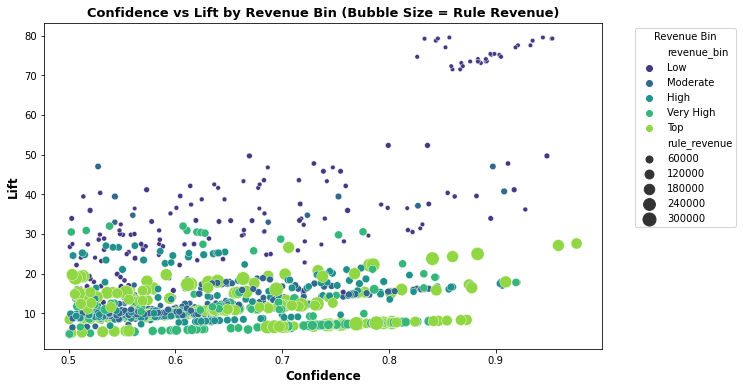

In [131]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='confidence', y='lift', hue='revenue_bin', size='rule_revenue', sizes=(20, 200), palette="viridis")
plt.title("Confidence vs Lift by Revenue Bin (Bubble Size = Rule Revenue)", fontsize=13, fontweight='bold')
plt.xlabel("Confidence", fontsize=12, fontweight='bold')
plt.ylabel("Lift", fontsize=12, fontweight='bold')
plt.legend(title="Revenue Bin", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The plot reveals that high-revenue rules (green/yellow bubbles) often align with higher confidence and slightly elevated lift values, indicating reliable, profitable associations. Low to moderate revenue rules (smaller, blue bubbles) cluster at lower confidence and lift, showing weaker associations with limited revenue impact. Notably, low-to-moderate revenue rules with high lift often signify niche associations with less financial impact, despite strong correlation. Top revenue rules (large yellow bubbles) typically show mid-to-high confidence with moderate lift, suggesting broader appeal drives revenue. Prioritizing high-confidence, high-revenue rules is recommended for targeted marketing, while high-lift rules should be balanced against revenue for optimal impact.

In [132]:
high_value_rules = rules[(rules['rule_revenue'] > rules['rule_revenue'].quantile(0.9)) & (rules['confidence'] > 0.7)]
high_value_rules[['antecedents', 'consequents', 'confidence', 'rule_revenue']]

,antecedents,consequents,confidence,rule_revenue
335,"[JUMBO BAG RED RETROSPOT, GREEN REGENCY TEACUP...",[DOTCOM POSTAGE],0.840741,323415.12
336,"[ROSES REGENCY TEACUP AND SAUCER , DOTCOM POST...",[GREEN REGENCY TEACUP AND SAUCER],0.811847,258170.34
337,"[DOTCOM POSTAGE, GREEN REGENCY TEACUP AND SAUCER]",[ROSES REGENCY TEACUP AND SAUCER ],0.703927,258170.34
341,"[DOTCOM POSTAGE, JAM MAKING SET PRINTED]",[SUKI SHOULDER BAG],0.706081,238208.36
342,"[SUKI SHOULDER BAG, JAM MAKING SET PRINTED]",[DOTCOM POSTAGE],0.958716,238208.36
343,"[DOTCOM POSTAGE, JUMBO BAG BAROQUE BLACK WHITE]",[JUMBO BAG RED RETROSPOT],0.801471,328681.02
344,"[DOTCOM POSTAGE, JUMBO BAG PINK POLKADOT]",[JUMBO BAG RED RETROSPOT],0.802899,343025.06
353,"[DOTCOM POSTAGE, JUMBO BAG TOYS ]",[JUMBO BAG RED RETROSPOT],0.794872,311603.44
355,"[DOTCOM POSTAGE, JUMBO BAG WOODLAND ANIMALS]",[JUMBO BAG RED RETROSPOT],0.756233,322681.24
358,"[JUMBO SHOPPER VINTAGE RED PAISLEY, DOTCOM POS...",[JUMBO BAG RED RETROSPOT],0.771350,329223.77


In [133]:
high_lift_revenue = rules[(rules['lift'] > rules['lift'].quantile(0.5)) & (rules['rule_revenue'] > rules['rule_revenue'].mean())]
high_lift_revenue[['antecedents', 'consequents', 'lift', 'rule_revenue']]

,antecedents,consequents,lift,rule_revenue
17,[BEADED CRYSTAL HEART PINK ON STICK],[DOTCOM POSTAGE],27.584360,206974.03
35,[CHARLIE+LOLA PINK HOT WATER BOTTLE],[DOTCOM POSTAGE],19.419060,209639.65
66,[FLORAL FOLK STATIONERY SET],[DOTCOM POSTAGE],15.299350,209612.11
68,[JUMBO BAG TOYS ],[DOTCOM POSTAGE],14.785167,217263.39
72,[MODERN FLORAL STATIONERY SET],[DOTCOM POSTAGE],15.525623,209129.22
...,...,...,...,...
853,"[JUMBO BAG PINK POLKADOT, JUMBO BAG WOODLAND A...","[JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT]",15.036916,189638.83
860,"[JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...","[JUMBO STORAGE BAG SUKI, JUMBO BAG RED RETROSPOT]",15.786620,196181.36
861,"[JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT]","[JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO BAG ...",15.274163,196181.36
863,"[JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",[JUMBO BAG WOODLAND ANIMALS],13.164863,175837.54


In [134]:
data_UK = data[data['Country'] == 'United Kingdom']
data_not_UK = data[data['Country'] != 'United Kingdom']

In [135]:
pivot_table_UK = pd.pivot_table(data_UK[['InvoiceNo','Description']], 
                                  index='InvoiceNo', columns='Description', aggfunc=lambda x: True, fill_value=False)

In [136]:
binary_pivot_UK = pivot_table_UK.applymap(lambda x: 1 if x > 0 else 0)

In [137]:
frequent_itemsets_UK = apriori(binary_pivot_UK, min_support=0.01, use_colnames=True, low_memory=True)
rules_UK = association_rules(frequent_itemsets_UK, metric="confidence", min_threshold=0.5)

In [138]:
top_rules_UK = rules_UK.sort_values(by='confidence', ascending=False).head(5)
top_rules_UK[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
17,(BEADED CRYSTAL HEART PINK ON STICK),(DOTCOM POSTAGE),0.011156,0.975728,24.901799
401,"(SUKI SHOULDER BAG, GREEN REGENCY TEACUP AND ...",(DOTCOM POSTAGE),0.010157,0.963158,24.580990
406,"(SUKI SHOULDER BAG, JAM MAKING SET PRINTED)",(DOTCOM POSTAGE),0.011600,0.963134,24.580371
560,"(HERB MARKER MINT, HERB MARKER THYME)",(HERB MARKER ROSEMARY),0.010601,0.955000,74.490000
566,"(HERB MARKER ROSEMARY, HERB MARKER PARSLEY)",(HERB MARKER THYME),0.010934,0.951691,74.554631


In [139]:
pivot_table_not_UK = pd.pivot_table(data_not_UK[['InvoiceNo','Description']], 
                                  index='InvoiceNo', columns='Description', aggfunc=lambda x: True, fill_value=False)

In [140]:
binary_pivot_not_UK = pivot_table_not_UK.applymap(lambda x: 1 if x > 0 else 0)

In [141]:
frequent_itemsets_not_UK = apriori(binary_pivot_not_UK, min_support=0.01, use_colnames=True, low_memory=True)
rules_not_UK = association_rules(frequent_itemsets_not_UK, metric="confidence", min_threshold=0.5)

In [142]:
top_rules_not_UK = rules_not_UK.sort_values(by='confidence', ascending=False).head(5)
top_rules_not_UK[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

,antecedents,consequents,support,confidence,lift
2147,"(SPACEBOY CHILDRENS CUP, DOLLY GIRL CHILDRENS ...",(DOLLY GIRL CHILDRENS CUP),0.011334,1.0,35.944444
3495,"(REGENCY TEA PLATE ROSES , REGENCY TEA PLATE P...",(REGENCY TEA PLATE GREEN ),0.010304,1.0,43.133333
2752,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS, PACK OF...",(SET/6 RED SPOTTY PAPER PLATES),0.012365,1.0,17.807339
1402,"(SET/6 RED SPOTTY PAPER CUPS, PACK OF 6 SKULL ...",(SET/6 RED SPOTTY PAPER PLATES),0.014426,1.0,17.807339
3476,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY TEA ...",(ROSES REGENCY TEACUP AND SAUCER ),0.011334,1.0,17.807339


In [143]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

In [144]:
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
data['Month'] = data['Month'].replace(month_names)

In [145]:
data_2010 = data[data['Year'] == 2010]
data_2011 = data[data['Year'] == 2011]

In [146]:
pivot_table_2010 = pd.pivot_table(data_2010[['InvoiceNo','Description']], 
                                  index='InvoiceNo', columns='Description', aggfunc=lambda x: True, fill_value=False)


In [147]:
pivot_table_2011 = pd.pivot_table(data_2011[['InvoiceNo','Description']], 
                                  index='InvoiceNo', columns='Description', aggfunc=lambda x: True, fill_value=False)

In [148]:
binary_pivot_2010 = pivot_table_2010.applymap(lambda x: 1 if x > 0 else 0)

In [149]:
binary_pivot_2011 = pivot_table_2011.applymap(lambda x: 1 if x > 0 else 0)

In [ ]:
one_percent_frequent_itemsets_2010 = apriori(binary_pivot_2010, min_support=0.01, use_colnames=True, low_memory=True)


In [ ]:
one_percent_frequent_itemsets_2011 = apriori(binary_pivot_2011, min_support=0.01, use_colnames=True, low_memory=True)

In [ ]:
rules_2010 = association_rules(one_percent_frequent_itemsets_2010, metric="confidence", min_threshold=0.5)

In [ ]:
rules_2011 = association_rules(one_percent_frequent_itemsets_2011, metric="confidence", min_threshold=0.5)

In [ ]:
top_rules_2010 = rules_2010.sort_values(by='confidence', ascending=False).head(10)
top_rules_2010[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In [ ]:
top_rules_2011 = rules_2011.sort_values(by='confidence', ascending=False).head(10)
top_rules_2011[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

In conclusion, the results highlight how product combinations and purchase frequencies vary across different regions, months, and years, reflecting dynamic patterns in customer behavior. This market basket analysis can be further refined through cross-combination segmentation to deliver even more targeted business insights. Overall, market basket analysis proves to be a powerful tool for driving informed, data-driven decisions that align closely with customer preferences and business objectives.